Part 1

In [1]:
from graphviz import Digraph, nohtml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image  
from sklearn.tree import export_text
import pydotplus
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns 
from sklearn import datasets
from sklearn import tree

In [2]:
df= pd.read_csv("Mobileye_risk_TelAviv_collision_likelihood_.csv")

In [3]:
df.describe()

,detection_drives_count,avg_speed,near_miss_pedestrian_ratio,near_miss_bicycle_ratio,avg_pedestrian_on_road_volume,avg_bicycle_on_road_volume,braking_count,cornering_count,harsh_braking_ratio,harsh_cornering_ratio,section_length
count,9266.000000,9266.000000,9230.000000,9249.000000,9266.000000,9266.000000,9214.000000,9266.000000,5162.000000,9266.000000,9266.000000
mean,557.363048,34.631136,0.004318,0.000931,0.050953,0.026391,66.295854,276.613857,0.000003,0.015083,42.657029
std,1303.459900,13.204298,0.015206,0.004905,0.074877,0.043735,138.626508,614.604640,0.000175,0.037954,44.375733
min,50.000000,9.923498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.671996
25%,93.000000,25.997728,0.000000,0.000000,0.001731,0.000000,5.000000,38.000000,0.000000,0.000000,11.204812
50%,188.000000,31.902938,0.000000,0.000000,0.020090,0.010441,21.000000,87.000000,0.000000,0.001331,26.910230
75%,481.000000,39.849982,0.000167,0.000000,0.067423,0.033782,68.000000,265.000000,0.000000,0.011058,62.054658
max,25047.000000,90.656510,0.476190,0.157895,0.780000,0.716418,2715.000000,7130.000000,0.012346,0.636364,449.794289


In [4]:
df=df.replace(["Low","High"],[0,1])

In [5]:
print(f'Dangerous ratio: {df["collision_likelihood"].mean()*100}')
print(f'Not Dangerous ratio: {100-df["collision_likelihood"].mean()*100}')

Dangerous ratio: 23.936973883013167
Not Dangerous ratio: 76.06302611698683


In [6]:
df.isna().sum()




detection_drives_count              0
avg_speed                           0
near_miss_pedestrian_ratio         36
near_miss_bicycle_ratio            17
avg_pedestrian_on_road_volume       0
avg_bicycle_on_road_volume          0
braking_count                      52
cornering_count                     0
harsh_braking_ratio              4104
harsh_cornering_ratio               0
section_length                      0
collision_likelihood                0
dtype: int64

Part 2

In [7]:
df.drop("harsh_braking_ratio",axis=1,inplace=True)

In [8]:
df

,detection_drives_count,avg_speed,near_miss_pedestrian_ratio,near_miss_bicycle_ratio,avg_pedestrian_on_road_volume,avg_bicycle_on_road_volume,braking_count,cornering_count,harsh_cornering_ratio,section_length,collision_likelihood
0,298,30.062881,0.000000,0.0,0.033557,0.033557,21.0,183,0.004966,10.010314,0
1,126,26.210692,0.000000,0.0,0.071429,0.015873,0.0,0,0.000000,24.101012,0
2,581,32.475986,0.001721,0.0,0.010327,0.000000,60.0,389,0.002571,9.673643,0
3,294,34.194698,0.003401,0.0,0.013605,0.003401,29.0,201,0.003253,10.088931,0
4,75,30.859624,0.000000,0.0,0.026667,0.000000,11.0,48,0.020833,71.514146,0
...,...,...,...,...,...,...,...,...,...,...,...
9261,106,28.528539,0.000000,0.0,0.216981,0.198113,0.0,0,0.000000,62.242535,0
9262,61,17.195242,0.000000,0.0,0.163934,0.081967,0.0,0,0.000000,53.340860,0
9263,64,29.359287,0.000000,0.0,0.046875,0.062500,2.0,26,0.023077,7.212610,0
9264,6354,71.557144,0.000000,0.0,0.000000,0.000157,31.0,224,0.009143,50.845719,0


In [9]:
values = {'near_miss_pedestrian_ratio': df["near_miss_pedestrian_ratio"].mean(), 'near_miss_bicycle_ratio': df["near_miss_bicycle_ratio"].median()}
df=df.fillna(value=values)

In [10]:
def fill_NaN_with_normalRand(column):
    for cell in np.where(column.isnull())[0]:
        column.at[cell]=(np.random.normal(column.mean(),column.std()))
  


In [11]:
fill_NaN_with_normalRand(df["braking_count"])

In [12]:
df.isna().sum()

detection_drives_count           0
avg_speed                        0
near_miss_pedestrian_ratio       0
near_miss_bicycle_ratio          0
avg_pedestrian_on_road_volume    0
avg_bicycle_on_road_volume       0
braking_count                    0
cornering_count                  0
harsh_cornering_ratio            0
section_length                   0
collision_likelihood             0
dtype: int64

In [13]:
cols = list(df.columns)
cols.remove('collision_likelihood')

X = df[cols].copy()
y = df["collision_likelihood"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7412, 10)
(1854, 10)
(7412,)
(1854,)


Part 3A

In [15]:
test_acc=list()
train_acc=list()

In [16]:
def create_decision_tree_classifier(X, y, d):
    tree_clf = DecisionTreeClassifier(max_depth=d)
    tree_clf = tree_clf.fit(X, y)
    return tree_clf

In [17]:
depth_range=range(1,21)
for d in depth_range:
    tree_clf = create_decision_tree_classifier(X_train, y_train,d)
    y_pred = tree_clf.predict(X_test)
    y_pred2= tree_clf.predict(X_train)
    test_acc.append(metrics.accuracy_score(y_test, y_pred))
    train_acc.append(metrics.accuracy_score(y_train, y_pred2))
    

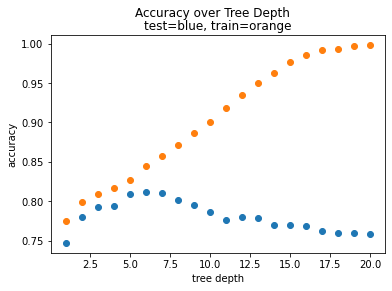

In [18]:
plt.scatter(depth_range,test_acc)
plt.scatter(depth_range,train_acc)
plt.title('test=blue, train=orange')
plt.suptitle('Accuracy over Tree Depth')
plt.xlabel("tree depth")
plt.ylabel("accuracy")
plt.show()

In [19]:
tree_clf=DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=0 )
tree_clf = tree_clf.fit(X_train, y_train)

Part 3B

In [20]:
def giniCalculation(y_train):
    values, counts = np.unique(y_train, return_counts=True)
    gini=0;
    sigma=0
    if (len(values) < 2):
        return(gini)
    omega = len(y_train)
    for count in counts:
        sigma += np.square(count / omega)
    gini = 1 - sigma
    return(gini)

In [21]:
print(giniCalculation(y_train))

0.3631279435136615


In [22]:
def giniLevel2Padestrian(X_train,y_train):
    X_trainCopy= X_train.copy()
    X_trainCopy["collision_likelihood"]=y_train
    y_omega1 = X_trainCopy[X_trainCopy['near_miss_pedestrian_ratio'] <= 0.002]
    y_train1=y_omega1['collision_likelihood']
    y_omega2 = X_trainCopy[X_trainCopy['near_miss_pedestrian_ratio'] > 0.002]
    y_train2=y_omega2['collision_likelihood']
    gini1=giniCalculation(y_train1)
    gini2=giniCalculation(y_train2) 
    return(((len(y_train1)/len(X_trainCopy))*gini1)+((len(y_train2)/len(X_trainCopy))*gini2))
   

In [23]:
print(giniLevel2Padestrian(X_train,y_train))

0.3143097659051589


In [24]:
def giniLevel2Section(X_train,y_train):
    X_trainCopy= X_train.copy()
    X_trainCopy["collision_likelihood"]=y_train
    y_omega1 = X_trainCopy[X_trainCopy['section_length'] <= 23]
    y_train1=y_omega1['collision_likelihood']
    y_omega2 = X_trainCopy[X_trainCopy['section_length'] > 23]
    y_train2=y_omega2['collision_likelihood']
    gini1=giniCalculation(y_train1)
    gini2=giniCalculation(y_train2) 
    return(((len(y_train1)/len(X_trainCopy))*gini1)+((len(y_train2)/len(X_trainCopy))*gini2))
   

In [25]:
print(giniLevel2Section(X_train,y_train))

0.33608437416296805


In [26]:
tree_importance=tree_clf.feature_importances_
impotance_features=pd.DataFrame({"Feature":cols,"Impotance":tree_importance})
impotance_features=impotance_features.sort_values("Impotance", ascending=False)

Text(0.5, 1.0, 'Impotance over features')

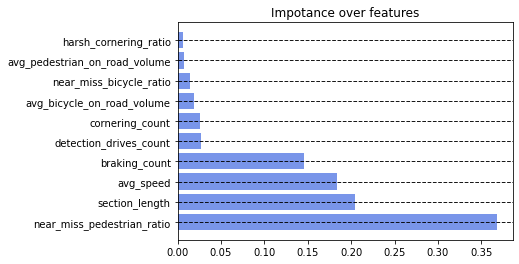

In [27]:
plt.barh(impotance_features["Feature"],impotance_features["Impotance"], color='royalblue', alpha=0.7)
plt.grid(color='black', linestyle='--', linewidth=1, axis='y', alpha=0.9)
plt.title('Impotance over features')

Part 3C

In [28]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

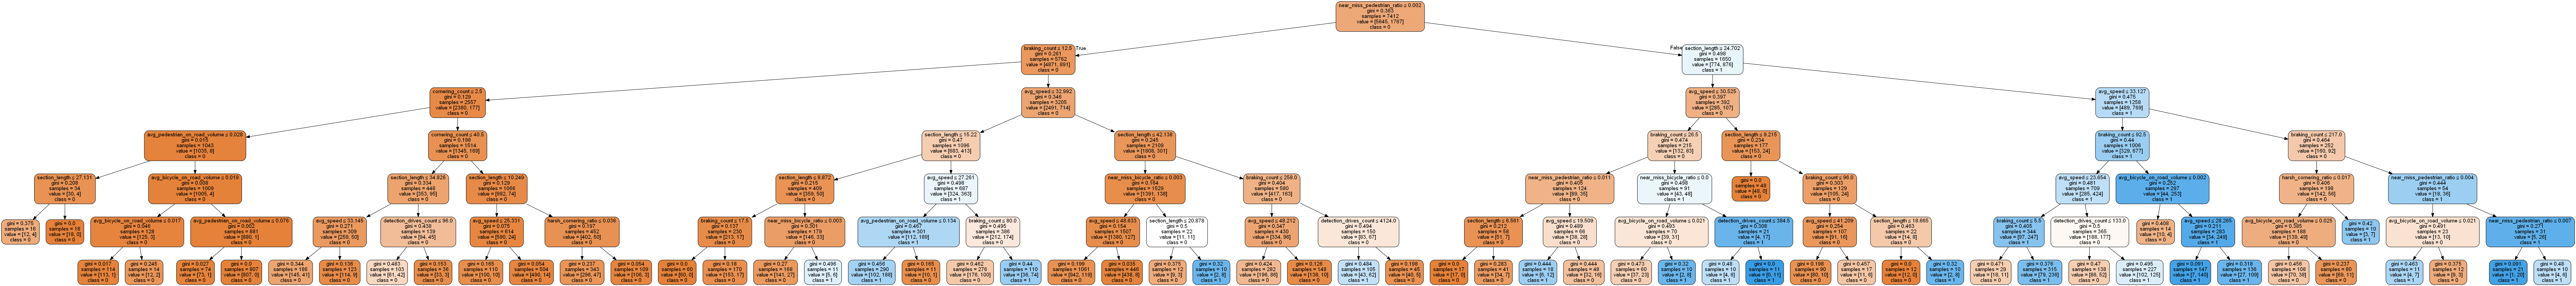

In [29]:
dot_data = StringIO()
export_graphviz(tree_clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = list(X.columns),
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('collision_likelihood.png')
Image(graph.create_png())